Most of these files are Rabi oscillation data versus one parameter (such as drive power or frequency). This notebook works if you want to plot and fit rabi oscillations

In [2]:
# import sys
# sys.path.append('/Users/billystrickland/Documents/code/resonators')
import matplotlib.pyplot as plt
from shabanipy.labber import LabberData
import numpy as np

from shabanipy.resonators.billys_code.utils.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.resonators.billys_code.utils.jy_mpl_settings.colors import line_colors

from scipy.optimize import curve_fit

import shabanipy.resonators.billys_code.utils.qubit_functions as qf
import shabanipy.resonators.billys_code.utils.resonator_functions as rf

plt.style.use(jy_mpl_rc)

In [3]:
# Define the file path and channels
day = '17'
file_num = '434'
month = '03'
year = '2024'
end = f'/{year}/{month}/Data_{month}{day}/JS801-4fluxonium@v5-01-CD02-WMSLJB-{file_num}.hdf5'

root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data'

FILE = f"{root}{end}"

# Define the channels for the data
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal', 'SC3 - Drive - Frequency']
I_CH, Q_CH, D_CH = channels

# Extract the data
with LabberData(FILE) as f:
    I, Q = f.get_data(I_CH), f.get_data(Q_CH)
    power = f.get_data(D_CH)

Text(0.5, 1.0, 'Signal Trace at Specific Time Step')

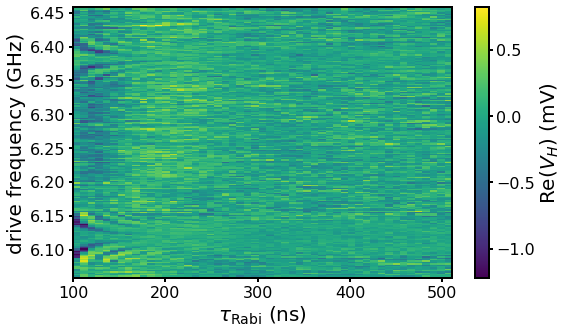

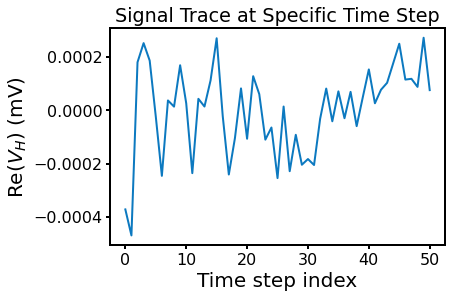

In [4]:
# Power data processing
power = np.unique(power)

# Select phase data from the signal for plotting
phase_2d = I[1, :, :, 0]

# Create time axis for the data (in seconds, scaled to ns)
time = np.linspace(10, len(phase_2d[0]), len(phase_2d[0])) * 10e-9
time_hr = np.linspace(10, len(phase_2d[0]), 5000) * 10e-9

# Sort the power data
power = np.sort(power)

# Select the signal from Q and average it
signal = Q[1, :, :, 0]
signal = rf.average_data(signal)

# Plot Rabi 2D
qf.plot_rabi_2d(signal[::-1] * 1e3, 
                r'$\tau_\mathrm{Rabi}$ (ns)',
                'drive frequency (GHz)', 
                'Re($V_H$) (mV)', 
                [time[0] * 1e9, time[-1] * 1e9, power[0] * 1e-9, power[-1] * 1e-9],
               )

# Plot a specific trace (signal at a specific time)
fig, ax = plt.subplots()
plt.plot(signal[153])  # You may adjust this index based on your specific data
plt.ylabel('Re($V_H$) (mV)')
plt.xlabel('Time step index')
plt.title('Signal Trace at Specific Time Step')


A, T, freq, m, b, p =  [ 8.77355288e-04  1.00000000e-07  6.44889643e+06  1.84989875e+02
 -5.17549565e-05  2.38035538e+00]
measured meter swing =  -0.0 deg


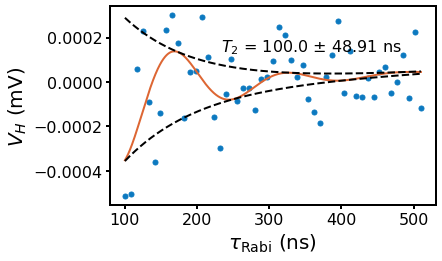

In [17]:
# Define fitting functions
def decaying_sin(t, A, T, freq, m, b, p):
    return -A*np.exp(-t/T)*np.cos(freq*2*np.pi*t + p) + m*t + b

def sin_simple(t, A, freq, b):
    return A * np.cos(freq * 2 * np.pi * t) + b

def decay(t, A, T, m, b):
    return -A * np.exp(-t / T) + m * t + b

def decay_ref(t, A, T, m, b):
    return A * np.exp(-t / T) + m * t + b

# Select the signal for fitting
signaly = signal[152]

# Set bounds for fitting parameters
bounds = [
    [0, 100e-9, 2e6, 0, signaly[0] - 20, 0],   # Lower bounds
    [100, 1000e-9, 1.7e7, 1e10, signaly[0] + 20, 2 * np.pi + .001]  # Upper bounds
]

# Perform the Rabi fit
popt, perr, fig, ax = qf.fit_rabi_linecut(time = time, signal = signaly, bounds = bounds)

# Annotate the plot with the fitted $T_2^{\mathrm{Rabi}}$ value
T2_rabi = popt[1] * 1e9  # Convert to ns if needed
ax.annotate('$T_2^{\mathrm{Rabi}}$ = {T2_rabi:.2f} ns', xy=(0, 0)
#             , xycoords='figure fraction', fontsize=12
           )

# Display the plot
plt.show()


In [37]:
month = '10'
day = '20'
year = '2023'
file_num = '036'

# Assuming qf.get_data_rabiplus1 is a function that loads the data
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, freq=True)

# Now you can process I, Q, and drive as required
print("I:", I)
print("Q:", Q)
print("Drive:", drive)


I: [[[-0.01458146 -0.01446748 -0.01453046 ... -0.01561238 -0.0151481
   -0.01521761]
  [-0.01456949 -0.01473574 -0.01439975 ... -0.01535469 -0.01554061
   -0.01534258]
  [-0.01442086 -0.01474751 -0.0143     ... -0.01540581 -0.01514905
   -0.01516031]
  ...
  [-0.0143326  -0.01430509 -0.01425945 ... -0.01491344 -0.01491175
   -0.01495148]
  [-0.01414279 -0.01412663 -0.01421695 ... -0.01515223 -0.01541097
   -0.01501039]
  [-0.0142585  -0.0142136  -0.01414327 ... -0.01509144 -0.01499219
   -0.01475089]]

 [[-0.0141701  -0.01394788 -0.01392264 ... -0.01481537 -0.01463752
   -0.01465787]
  [-0.01390983 -0.01409568 -0.01415609 ... -0.01466069 -0.01465768
   -0.01486942]
  [-0.01434137 -0.01448174 -0.01410326 ... -0.01478698 -0.01487655
   -0.0149779 ]
  ...
  [-0.01397703 -0.01385089 -0.01373769 ... -0.01439795 -0.01485431
   -0.01449803]
  [-0.01392905 -0.01389658 -0.01362218 ... -0.01449708 -0.01477752
   -0.01453824]
  [-0.01410725 -0.01395499 -0.01351645 ... -0.01449439 -0.01442232
   -

In [38]:
# Initialize phase_2d and power from drive signal
phase_2d = []
power = drive[:, 0]  # Assuming `drive` is a 2D array where power is in the first column

# Define time index to slice phase data
time_i = 60

# Get 2D phase data using the qf.get_timed_phase2d function (likely custom or part of your library)
phase_2d = qf.get_timed_phase2d(I, Q, 20)[::-1]  # Assuming the function gives phase info and reversing it

# Generate time array for signal (assuming `signal` is already defined earlier)
time = np.linspace(1, len(signal), len(signal)) * 1e-9  # Time in seconds, based on signal length

# Generate high resolution time array (e.g., for smoother plotting or analysis)
time_hr = np.linspace(1, len(signal), 5000) * 1e-9  # 5000 points for high resolution time axis


(<Figure size 576x360 with 2 Axes>,
 <AxesSubplot:xlabel='$\\tau_\\mathrm{Rabi}$ (ns)', ylabel='drive frequency (GHz)'>)

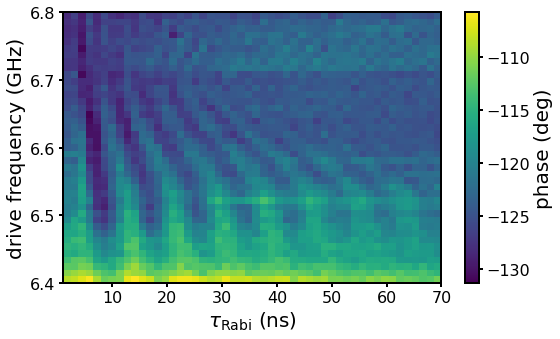

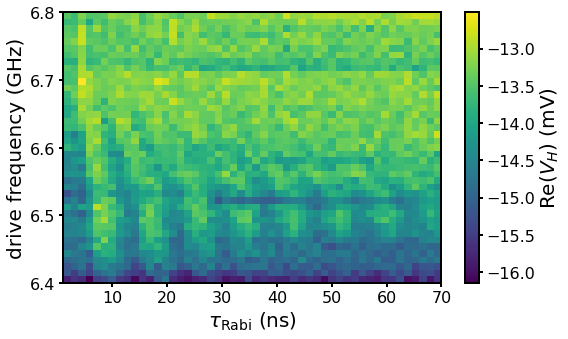

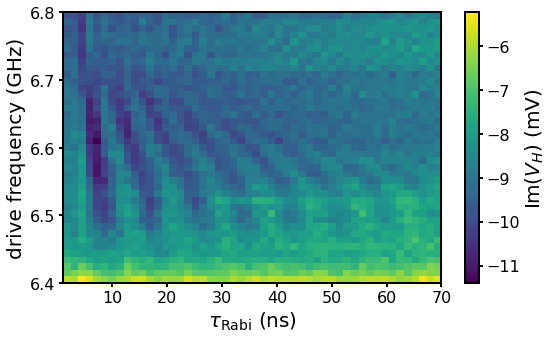

In [39]:
# Plot phase data (2D Rabi plot)
qf.plot_rabi_2d(phase_2d, 
                r'$\tau_\mathrm{Rabi}$ (ns)',  # Time axis in ns
                'drive frequency (GHz)',  # Frequency axis in GHz
                'phase (deg)',  # Phase axis in degrees
                [time[0]*1e9, time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])  # Time (ns) and power (W)

# Plot Re(V_H) component of the signal (2D Rabi plot)
qf.plot_rabi_2d(I[:,:,time_i][::-1]*1e3,  # I signal at time slice 'time_i', converted to mV
                r'$\tau_\mathrm{Rabi}$ (ns)',  # Time axis in ns
                'drive frequency (GHz)',  # Frequency axis in GHz
                'Re($V_H$) (mV)',  # Re(V_H) in mV
                [time[0]*1e9, time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])  # Time (ns) and power (W)

# Plot Im(V_H) component of the signal (2D Rabi plot)
qf.plot_rabi_2d(Q[:,:,time_i][::-1]*1e3,  # Q signal at time slice 'time_i', converted to mV
                r'$\tau_\mathrm{Rabi}$ (ns)',  # Time axis in ns
                'drive frequency (GHz)',  # Frequency axis in GHz
                'Im($V_H$) (mV)',  # Im(V_H) in mV
                [time[0]*1e9, time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])  # Time (ns) and power (W)


A, T, freq, m, b, p =  [0.00000000e+00 6.50000000e-08 1.00000000e+08 1.03844320e+00
 1.12270366e+02 3.14159265e+00]
measured meter swing =  0.0 deg


(array([0.00000000e+00, 6.50000000e-08, 1.00000000e+08, 1.03844320e+00,
        1.12270366e+02, 3.14159265e+00]),
 array([0.00000000e+00, 6.69239538e-15, 8.36547579e-16, 2.57050656e-01,
        7.53162807e+00, 0.00000000e+00]),
 <Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\tau_\\mathrm{Rabi}$ (ns)', ylabel='$V_H$ (mV)'>)

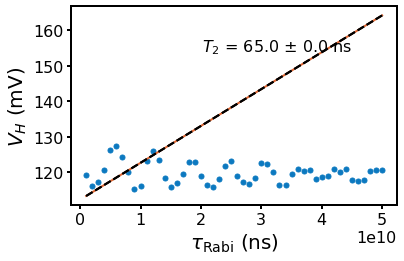

In [45]:
# Select the last 10th row of phase_2d and negate it
signal = -phase_2d[-10]

# Define the bounds for the fitting parameters
bounds = [
    [-10, 30e-9, 0, 1e-9, signal[0] - 20, 0],
    [10, 100e-9, 0.2e9, 1e9, signal[0] + 20, 2 * np.pi]
]

qf.fit_rabi_linecut(time = np.linspace(1,50,50), signal = signal, bounds = bounds)

In [26]:
# Specify the day, file number, month, and year for the data you want to analyze
day = '19'  # Day of the experiment
file_num = '459'  # Specific file number containing the data

# Retrieve the experimental data for the given parameters
# The `qf.get_data_rabiplus1` function loads the data for the given day, file number, and sample.
I, Q, drive = qf.get_data_rabiplus1(
    day,  # Day of the data file
    month=month,  # Month of the data file (assumed to be defined earlier)
    year=year,  # Year of the data file (assumed to be defined earlier)
    file_num=file_num,  # File number specifying the experiment
    sample='JS681-4fluxonium-005-002-BS'  # Specific sample used in the experiment
)

# `I` and `Q` represent the in-phase and quadrature components of the signal
# `drive` contains the drive signal data, potentially the drive frequency or control parameters


In [27]:
# Initialize the phase_2d list to store the phase data
phase_2d = []

# Extract the power from the drive signal, assuming it's in the first column of 'drive'
power = drive[:, 0]

# Set the time index where you want to analyze the signal. In this case, it's index 60.
time_i = 60

# Get the 2D phase data (from I and Q signals) using a specific time slice (10 units here).
# The slicing [::-1] reverses the phase_2d data.
phase_2d = qf.get_timed_phase2d(I, Q, 10)[::-1]

# Generate time array for the signal. 'signal' is assumed to be defined earlier in the code.
# 'np.linspace' generates a linear space from 1 to the length of the signal, and the units are converted to seconds.
time = np.linspace(1, len(signal), len(signal)) * 1e-9  # Time in seconds (ns -> s)

# Generate high-resolution time array for plotting or analysis. 
# Here, 5000 points are used for better resolution (this is often for interpolation or finer plotting).
time_hr = np.linspace(1, len(signal), 5000) * 1e-9  # High-res time in seconds


(<Figure size 576x360 with 2 Axes>,
 <AxesSubplot:xlabel='$\\tau_\\mathrm{Rabi}$ (ns)', ylabel='drive frequency (GHz)'>)

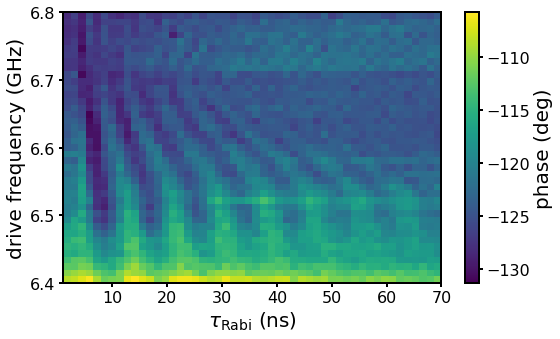

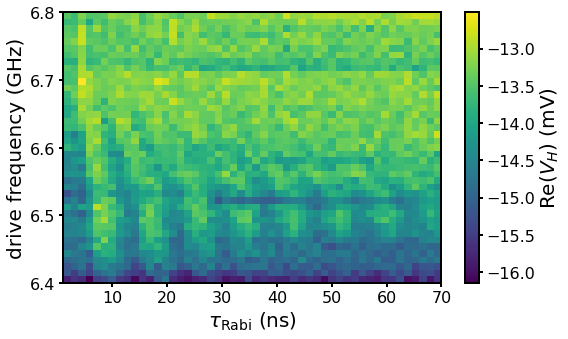

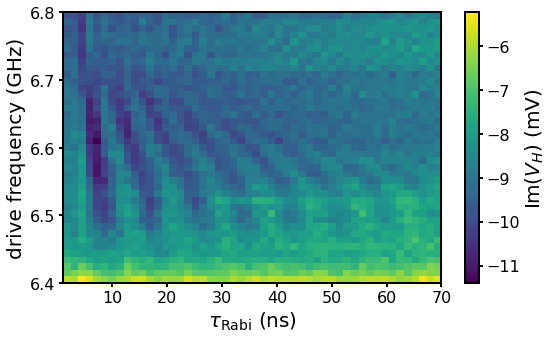

In [46]:
# Plot Phase(V_H) component of the signal (2D Rabi plot)
qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'phase (deg)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])

# Plot Re(V_H) component of the signal (2D Rabi plot)
qf.plot_rabi_2d(I[:,:,time_i][::-1]*1e3, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'Re($V_H$) (mV)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])

# Plot Im(V_H) component of the signal (2D Rabi plot)
qf.plot_rabi_2d(Q[:,:,time_i][::-1]*1e3, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'Im($V_H$) (mV)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])

A, T, freq, m, b, p =  [2.20476012e-01 9.99999999e-07 1.52224422e+08 1.97267386e-04
 1.32797450e+02 3.75901210e-09]
measured meter swing =  -0.44 deg


(array([2.20476012e-01, 9.99999999e-07, 1.52224422e+08, 1.97267386e-04,
        1.32797450e+02, 3.75901210e-09]),
 array([6.14420275e-01, 6.93468642e-05, 1.14721910e+07, 6.94314001e+05,
        2.22029874e-01, 2.88139833e+00]),
 <Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\tau_\\mathrm{Rabi}$ (ns)', ylabel='$V_H$ (mV)'>)

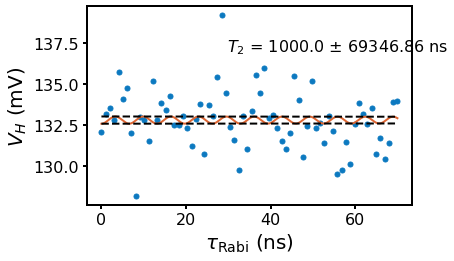

In [50]:
# Extract the signal at index 10 from the phase_2d array
signal = phase_2d[10]

# Define the bounds for the fitting function
# The bounds are set for the parameters in the 'decaying_sin' function
# These bounds help restrict the fit to physically meaningful values
bounds = [
    # Lower bounds for fitting parameters: 
    # [Amplitude (A), Decay time (T), Frequency (freq), Linear slope (m), Offset (b), Phase (p)]
    [-10, 30e-9, 0, 1e-9, signal[0] - 20, 0],
    
    # Upper bounds for fitting parameters:
    # [Amplitude (A), Decay time (T), Frequency (freq), Linear slope (m), Offset (b), Phase (p)]
    [10, 1000e-9, 0.2e9, 1e9, signal[0] + 20, 2 * np.pi]
]

# Create a time array from 0 to the length of the signal, with time units in seconds
# The signal length determines the resolution of the time array
time = np.linspace(0, len(signal), len(signal)) * 1e-9  # Time in seconds

# Perform the fit using the 'qf.fit_rabi_linecut' function
# It takes the time array, signal, and bounds as arguments
# This function will fit the signal to a decaying sine wave model (probably defined earlier)
qf.fit_rabi_linecut(time=time, signal=signal, bounds=bounds)


In [51]:
# Assign the day and file number of the data you want to retrieve
day = '19'
file_num = '461'

# Use the qf.get_data_rabiplus1 function to get the data for the specific day and file number
# The 'month', 'year', and 'sample' are parameters you need to specify as well
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample='JS681-4fluxonium-005-002-BS')


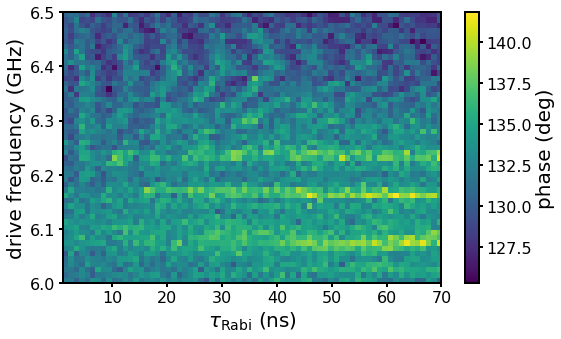

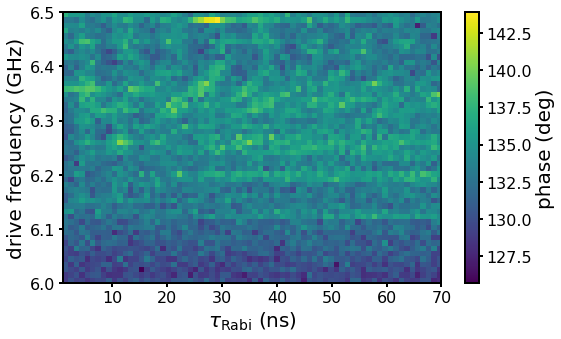

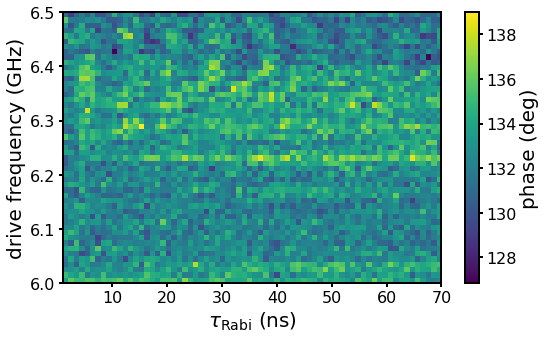

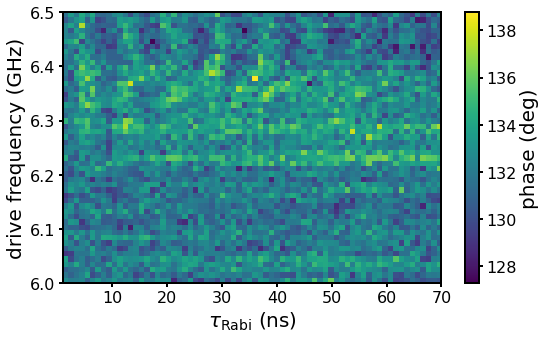

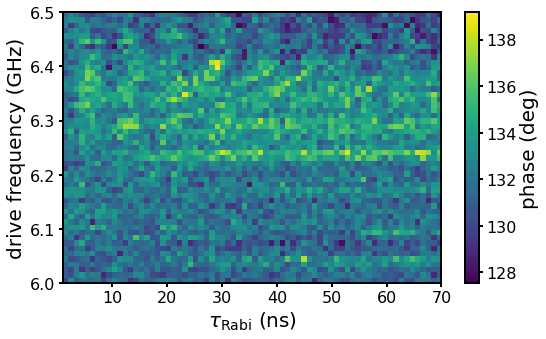

In [52]:
for mag_i in range(5):
    ill = I[mag_i]  # Extract the I component (in-phase) for the current index 'mag_i'
    qll = Q[mag_i]  # Extract the Q component (quadrature) for the current index 'mag_i'
    
    phase_2d = []  # Initialize an empty list to store the phase 2D data
    power = drive[0,:,0]  # Extract the drive signal power (this may depend on your data structure)
    
    # Get the timed phase2d data by calling the custom function 'get_timed_phase2d' (likely a part of your library 'qf')
    # The 25 indicates the number of points to be averaged (this number might vary depending on your experimental setup)
    phase_2d = qf.get_timed_phase2d(ill, qll, 25)[::-1]  # The [::-1] reverses the phase_2d data

    # Generate the time array, assuming 'signal' length matches with your data
    # Convert the signal length to nanoseconds
    time = np.linspace(1, len(signal), len(signal)) * 1e-9
    
    # Create a higher resolution time array for plotting
    time_hr = np.linspace(1, len(signal), 5000) * 1e-9
    
    # Plot the 2D Rabi plot using a custom function (qf.plot_rabi_2d)
    # This plots the phase_2d data, with appropriate labels and limits for the axes
    qf.plot_rabi_2d(phase_2d, 
                    r'$\tau_\mathrm{Rabi}$ (ns)', 
                    'drive frequency (GHz)', 
                    'phase (deg)', 
                    [time[0] * 1e9, time[-1] * 1e9, power[0] * 1e-9, power[-1] * 1e-9])


In [32]:
month = '09'  # Set the month to September
day = '19'    # Set the day to 19
file_num = '206'  # Specify the file number from which data will be fetched
# You are calling the function `qf.get_data_rabiplus1` with the given parameters to get the data from the specified day, month, and year
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample='JS681-4fluxonium-005-002-BS')


(<Figure size 576x360 with 2 Axes>,
 <AxesSubplot:xlabel='$\\tau_\\mathrm{Rabi}$ (ns)', ylabel='drive frequency (GHz)'>)

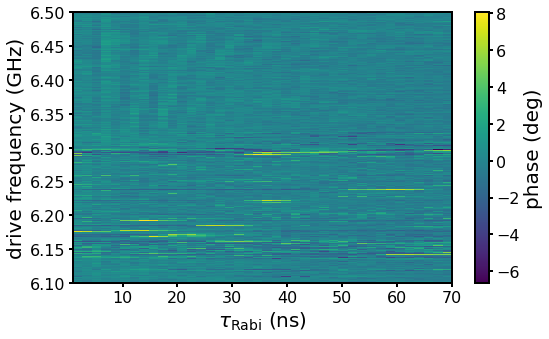

In [33]:
phase_2d = []  # Initialize an empty list for the 2D phase data
power = np.unique(drive)  # Extract the unique power values from the 'drive' signal (removes duplicates)

# Retrieve the phase information as a function of time and frequency
phase_2d = qf.get_timed_phase2d(I, Q, 100)[::-1]  # Get 2D phase data (reversed)

# Average the data over time or other specified dimensions
phase_2d = qf.average_data(phase_2d)  # Perform averaging on the 2D phase data

# Create a time array for plotting
time = np.linspace(1, len(signal), len(signal)) * 1e-9  # Create time array in seconds (scaled by 1e-9 to convert to seconds)
time_hr = np.linspace(1, len(signal), 5000) * 1e-9  # Create a high-resolution time array for more detailed plots

# Plot the Rabi oscillations in 2D with the given parameters
qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)', 'drive frequency (GHz)', 'phase (deg)', 
                [time[0]*1e9, time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])


In [57]:
month = '09'  # Set the month for the experiment
day = '20'  # Set the day for the experiment
file_num = '210'  # Set the file number for the experiment
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample = 'JS681-4fluxonium-005-002-BS', freq = False)


25


(<Figure size 576x360 with 2 Axes>,
 <AxesSubplot:xlabel='$\\tau_\\mathrm{Rabi}$ (ns)', ylabel='drive power (dB)'>)

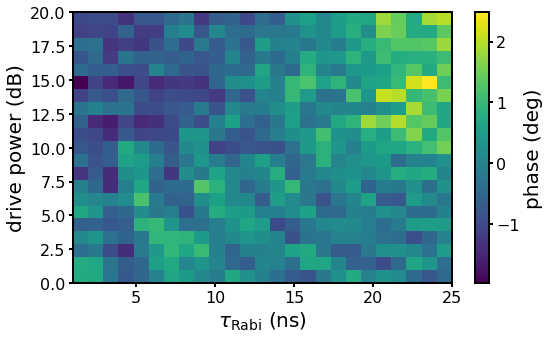

In [65]:
phase_2d = []  # Initialize the list to store the 2D phase data
power = np.unique(drive) * 1e9  # Get the unique drive power levels (converted to nW)
phase_2d = qf.get_timed_phase2d(I, Q, 20)  # Retrieve the timed 2D phase data from I and Q signals
phase_2d = qf.average_data(phase_2d)  # Average the phase data for better noise handling

time = np.linspace(1, 25, 25) * 1e-9  # Create a time array from 1 ns to the signal length
time_hr = np.linspace(1, 25, 5000) * 1e-9  # Create a high-resolution time array for plotting
qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)', 'drive power (dB)', 'phase (deg)', 
                [time[0] * 1e9, time[-1] * 1e9, power[0] * 1e-9, power[-1] * 1e-9])  # Plot the 2D Rabi plot
